In [1]:
Rover1Data = Import["RV1-red2.txt", "Data"];

In [2]:
Dimensions[Rover1Data]

{1256, 2}

2.26348     -4.34219

1.19462     -4.34219

1.19462     -4.34219

0.188623    -2.44944

-0.880243   -2.44944

-0.880242   -0.66803

-0.880242   -0.66803

-0.880242   -0.66803

-0.880242   -0.66803

-0.880242   -0.66803

-0.880242   -0.66803

-0.880242   -0.66803

-0.880242   -0.66803

-0.880242   -0.66803

-1.94911    -0.668029

-1.94911    -0.668029

-1.94911    -0.668029

-1.94911    -0.668029

-1.94911    -0.668029

-1.94911    -0.668029

-1.94911    1.22472

-1.94911    1.22472

-1.94911    3.11747

-0.880241   3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    4.89888

1.19461     4.89888

1.19461     3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    3.11747

0.188623    1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

-0.880241   3.11747

0.188623    3.11747

0.188623    4.89888

0.188623    4.89888

1.19461     4.89888

1.19461     4.89888

1.19461     4.89888

1.19461     4.89888

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     3.11747

1.19461     1.22472

0.188623    1.22472

0.188623    1.22472

0.188623    1.22472

-0.880242   1.22472

-0.880242   1.22472

-0.880242   -0.66803

-0.880242   -0.66803

-0.880242   -0.66803

0.188623    -0.66803

0.188623    -0.66803

1.19461     -0.668029

2.26348     -2.44944

3.33235     -0.668028

4.33834     -0.668027

5.4072      -0.668026

7.48206     -0.668023

7.48206     -0.668023

8.55092     1.22473

9.61979     1.22473

10.6258     1.22473

10.6258     3.11748

11.6946     4.8989

11.6946     4.8989

12.7635     6.79165

12.7635     8.6844

13.7695     10.4658

13.7695     12.3586

14.8383     12.3586

14.8383     14.2513

15.9072     16.0327

16.9132     16.0327

17.982      17.9255

19.0509     19.8183

20.0569     19.8183

21.1257     21.5997

22.1946     21.5997

23.2005     23.4924

24.2694     23.4924

25.3383     25.3852

27.4131     25.3852

28.4819     27.1666

29.4879     27.1666

30.5568     29.0594

31.6256     29.0594

32.6316     30.9522

33.7005     30.9522

34.7693     32.7336

35.7753     32.7336

36.8441     34.6264

37.913      34.6264

38.919      36.5191

39.9878     36.5191

41.0566     38.3006

42.0626     38.3006

42.0626     40.1933

43.1315    
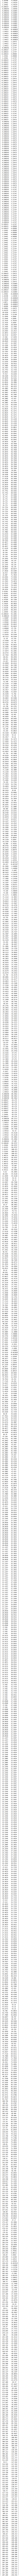

In [3]:
Rover1Data //  MatrixForm

-Graphics-
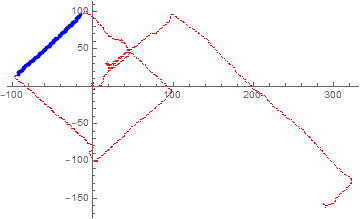

In [4]:
Show[ListPlot[Rover1Data, PlotStyle -> Red],
    ListPlot[Rover1Data[[315;;400]], PlotStyle -> Blue],
    PlotRange -> All]

In [5]:
Rover1LineInPark = Rover1Data[[315;;400]];

-15.5296   95.8623

-16.5985   93.9695

-17.6673   93.9695

-17.6673   92.1881

-18.6733   92.1881

-19.7422   90.2954

-20.811    90.2954

-20.811    88.4026

-21.817    86.6212

-22.8858   86.6212

-23.9547   84.7285

-24.9607   84.7285

-24.9607   82.8357

-26.0295   82.8358

-27.0984   81.0543

-28.1044   81.0544

-29.1732   81.0544

-30.2421   79.1616

-31.248    79.1616

-32.3169   77.2689

-32.3169   75.4875

-33.3857   75.4875

-34.3917   73.5947

-35.4606   73.5947

-36.5294   71.702

-37.5354   71.702

-38.6043   69.9206

-39.6732   68.0279

-40.6791   68.0279

-41.748    68.0279

-41.748    66.1351

-43.8228   64.3537

-44.8917   64.3538

-45.9605   64.3538

-45.9606   62.461

-46.9665   62.461

-48.0354   60.5683

-49.1043   60.5683

-49.1043   58.7869

-50.1103   58.7869

-51.1791   56.8942

-52.248    56.8942

-53.254    55.0014

-54.3228   55.0014

-54.3228   53.22

-55.3917   53.22

-57.4666   51.3273

-57.4666   51.3273

-58.5354   49.4346

-59.5414   49.4346

-60.6103   47.6532

-61.6791   47.6532

-62.6852   45.7605

-63.754    45.7605

-64.8229   43.8678

-65.8289   43.8678

-66.8978   42.0864

-66.8978   42.0864

-67.9666   40.1936

-68.9726   40.1937

-70.0415   38.3009

-71.1104   38.3009

-72.1164   36.5195

-73.1852   36.5196

-73.1852   36.5196

-74.2541   34.6268

-75.2601   34.6269

-76.329    32.7341

-77.3978   32.7341

-78.4039   30.9527

-79.4727   30.9528

-80.5416   29.06

-81.5476   29.0601

-82.6165   27.1673

-83.6854   27.1673

-84.6914   25.3859

-85.7602   25.386

-85.7603   23.4932

-86.8291   23.4932

-87.8352   21.6005

-88.904    21.6005

-89.9729   19.8191

-90.9789   19.8192

-92.0478   17.9264

-92.0478   17.9264

-93.1167   16.0337
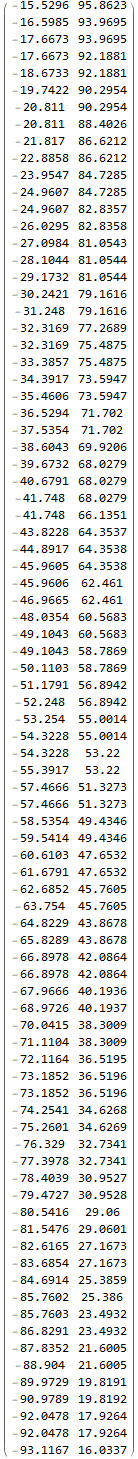

In [6]:
Rover1LineInPark // MatrixForm

# МНК

In [7]:
LSline = Fit[Rover1LineInPark, {x, 1}, x]

109.011 + 0.994911 x

-Graphics-
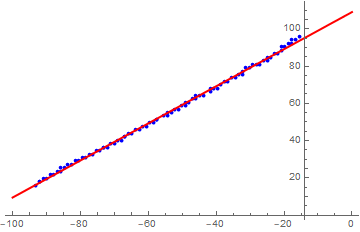

In [8]:
Show[ListPlot[Rover1Data[[315;;400]], PlotStyle -> Blue],
    Plot[LSline, {x, -100, 0}, PlotStyle -> {Thickness[0.007], Red}],
    PlotRange -> All]

# РНК

In [9]:
{u, s, v} = SingularValueDecomposition[Rover1LineInPark];

In [10]:
v // MatrixForm

-0.69602   0.718022

0.718022   0.69602

716.73   0.

0.       300.78

0.       0.
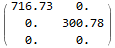

In [11]:
s[[1;;3]] // MatrixForm

In [12]:
a1 = - v[[2]][[1]] / v[[2]][[2]]

-1.03161

In [13]:
a2 = - Mean[Transpose[Rover1LineInPark][[1]]*a1 + Transpose[Rover1LineInPark][[2]]]

-110.99

-Graphics-
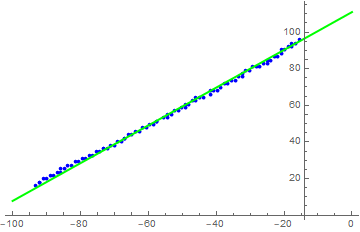

In [14]:
Show[ListPlot[Rover1Data[[315;;400]], PlotStyle -> Blue],
    Plot[- a2 - x*a1, {x, -100, 0}, PlotStyle -> {Thickness[0.007], Green}],
    PlotRange -> All]

# МНК и РНК

Legended[Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>        AbsoluteThickness[1.6], Thickness[0.005], RGBColor[1, 0, 0]]}, 
 
>      {МНК, RGBColor[1, 0, 0]}, LegendMarkers -> None, LabelStyle -> {}, 
 
>      LegendLayout -> Column], After, Identity]], 
 
>   Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], Thickness[0.005], 
 
>       RGBColor[0, 1, 0]]}, {РНК, RGBColor[0, 1, 0]}, LegendMarkers -> None, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
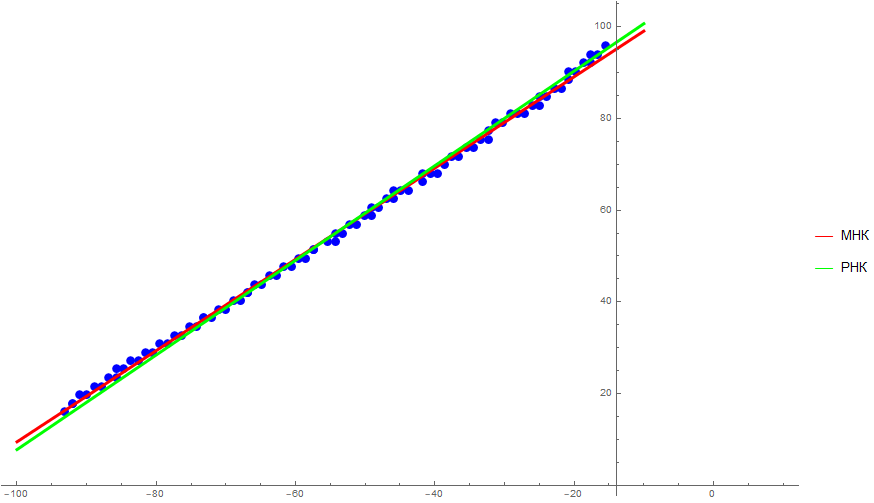

In [15]:
Show[ListPlot[Rover1Data[[315;;400]], PlotStyle -> Blue],
    Plot[LSline, {x, -100, -10}, PlotStyle -> {Thickness[0.005], Red}, PlotLegends -> {"МНК", Red}],
    Plot[- a2 - x*a1, {x, -100, -10}, PlotStyle -> {Thickness[0.005], Green}, PlotLegends -> {"РНК", Green}],
    PlotRange -> {{-100, 10}, {0, 100}}, ImageSize -> 800]

In [16]:
deltaAngle = - a1 - LSline[[2]][[1]]

0.0366996

In [17]:
deltaAngleInForm = {Floor[deltaAngle*180/Pi],
                Floor[Mod[deltaAngle*180/Pi, 1]*60],
                Mod[Mod[deltaAngle*180/Pi, 1]*60, 1]*60}

{2, 6, 9.83998}

# std МНК

In [18]:
inDistMHK = {}

{}

In [19]:
For[i = 1, i <= Dimensions[Rover1LineInPark][[1]], i++, 
            AppendTo[inDistMHK, {EuclideanDistance[Rover1LineInPark[[i]], 
            {Rover1LineInPark[[i]][[1]], LSline[[1]] + Rover1LineInPark[[i]][[1]]*LSline[[2]][[1]]}]}]]

In [20]:
Sqrt[Max[inDistMHK]]

1.59242

# std РНК

In [21]:
inDistPHK = {}

{}

In [22]:
For[i = 1, i <= Dimensions[Rover1LineInPark][[1]], i++, 
            AppendTo[inDistPHK, {EuclideanDistance[Rover1LineInPark[[i]], 
            {Rover1LineInPark[[i]][[1]], - a2 - Rover1LineInPark[[i]][[1]]*a1}]}]]

In [23]:
Sqrt[Max[inDistPHK]]

1.69324

In [24]:
BaseData = Import["BS-red2.txt", "Data"];

In [25]:
Dimensions[BaseData]

{1256, 2}

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   6.79163

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   
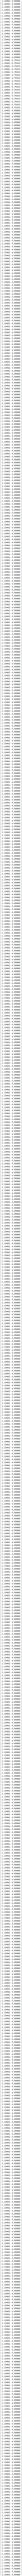

In [26]:
BaseData[[36;;906]] // MatrixForm

-Graphics-
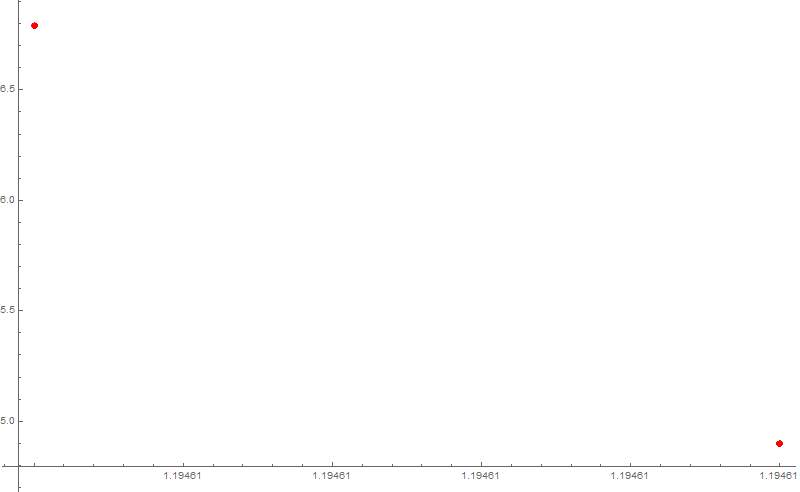

In [27]:
Show[ListPlot[BaseData[[36;;906]], PlotStyle -> Red], ImageSize -> 800]